## 주요절차

### 1. 초기데이터 분석

#### 1-1. 데이터딕셔너리(각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼) 확인
#### 1-2 데이터 기초정보 확인 (사이즈, 열이름, 데이터형, 결측치, 이상치확인)

### 2. 데이터 정제

#### 2.1. 원본데이터로에서 분석가능한 형태의 데이터 전처리 (형변환, 열이름 변경등)
#### 2.2. 데이터 클리닝: 이상치, 결측치처리

### 3. 추가데이터 분석

#### 3.1 데이터 정제후 데이터딕셔너리 재확인
#### 3.2 기초통계 정보 확인 (최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값 등)
#### 3.3 시각화를 통한 데이터이해 심화 

* 3.3.1 단일 열: 데이터의 성격에 따른 다양한 차트 적용  
* 3.3.2 복수 열: 두개의 열간 연관관계 분석(Pair Plot 또는 Seaborn의 관련 지원 차트등)

# 탐색적분석 적용 실습 템플릿

## 데이터 수집

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc
# 한글 폰트
font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname = font_location).get_name()
rc('font', family=font_name)

In [46]:
# 데이터 소스를 확보하세요
df = pd.read_csv("fulldata_11_46_02_P_민방위대피시설.csv", encoding='cp949')
df.head()

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,...,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),비상시설위치,시설구분명,시설명건물명,해제일자,Unnamed: 32
0,1,민방위대피시설,11_46_02_P,5090000,5090000-S198900003,19891207,NaN,1,영업/정상,18,...,U,2022-06-16 02:40:00.0,NaN,344927.833391,370456.199467,경상북도 영주시 하망동 344번지 34호,공공시설,대구은행,NaN,NaN
1,2,민방위대피시설,11_46_02_P,5090000,5090000-S197400001,19950329,NaN,1,영업/정상,18,...,U,2022-06-16 02:40:00.0,NaN,345125.748147,369669.863961,경상북도 영주시 휴천동 677번지,공공시설,KT영주지사,NaN,NaN
2,3,민방위대피시설,11_46_02_P,5090000,5090000-S199200002,19920526,NaN,1,영업/정상,18,...,U,2022-06-16 02:40:00.0,NaN,345657.013197,370577.911933,경상북도 영주시 하망동 276번지 23호,공공시설,코오롱2차아파트 보일러실,NaN,NaN
3,4,민방위대피시설,11_46_02_P,5090000,5090000-S199200004,19921109,NaN,1,영업/정상,18,...,U,2022-06-16 02:40:00.0,NaN,344866.737364,368384.000556,경상북도 영주시 휴천동 470번지,공공시설,영주시청 대피소,NaN,NaN
4,5,민방위대피시설,11_46_02_P,5090000,5090000-S199800002,19980301,NaN,1,영업/정상,18,...,U,2022-06-16 02:40:00.0,NaN,345499.772595,369763.112406,경상북도 영주시 휴천동 168번지,공공시설,현대동산아파트,NaN,NaN


## 1. 초기데이터 분석

### 1-1. 데이터스키마 확인

# 각 열의 의미, 데이터의 의미해석관련 스펙 또는 메뉴얼을 확인 가능시 진행 하세요
* A열: A열의 의미를 기술
* B열: B열의 의미를 기술  
...

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40429 entries, 0 to 40428
Data columns (total 33 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   번호           40429 non-null  int64  
 1   개방서비스명       40429 non-null  object 
 2   개방서비스아이디     40429 non-null  object 
 3   개방자치단체코드     40429 non-null  int64  
 4   관리번호         40429 non-null  object 
 5   인허가일자        40429 non-null  int64  
 6   인허가취소일자      22972 non-null  float64
 7   영업상태구분코드     40429 non-null  int64  
 8   영업상태명        40429 non-null  object 
 9   상세영업상태코드     40429 non-null  int64  
 10  상세영업상태명      40429 non-null  object 
 11  폐업일자         22972 non-null  float64
 12  휴업시작일자       0 non-null      float64
 13  휴업종료일자       0 non-null      float64
 14  재개업일자        0 non-null      float64
 15  소재지전화        0 non-null      float64
 16  소재지면적        40429 non-null  float64
 17  소재지우편번호      0 non-null      float64
 18  소재지전체주소      40251 non-null  object 
 19  도로명전

### 1-2. 데이터 기초정보 확인

* 사이즈, 데이터형, 기초통계항목등을 확인하세요  

In [48]:
df.shape
#df.info()

(40429, 33)

* 기초통계항목

In [49]:
df.describe()

,번호,개방자치단체코드,인허가일자,인허가취소일자,영업상태구분코드,상세영업상태코드,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전화,소재지면적,소재지우편번호,도로명우편번호,최종수정시점,업태구분명,좌표정보(x),좌표정보(y),해제일자,Unnamed: 32
count,40429.000000,4.042900e+04,4.042900e+04,2.297200e+04,40429.000000,40429.000000,2.297200e+04,0.0,0.0,0.0,0.0,40429.000000,0.0,22893.000000,4.042900e+04,0.0,23497.000000,23497.000000,2.297200e+04,0.0
mean,20215.000000,4.009412e+06,2.000386e+07,2.012259e+07,2.704618,18.568206,2.012259e+07,NaN,NaN,NaN,NaN,3667.773906,NaN,102683.573931,2.017430e+13,NaN,247209.670139,334058.775393,2.012259e+07,NaN
std,11670.991353,8.185579e+05,1.039766e+05,4.390088e+04,1.485997,0.495332,4.390088e+04,NaN,NaN,NaN,NaN,9916.439189,NaN,169685.004214,3.935929e+10,NaN,80854.125988,125873.529397,4.390088e+04,NaN
min,1.000000,3.000000e+06,1.900010e+07,1.992093e+07,1.000000,18.000000,1.992093e+07,NaN,NaN,NaN,NaN,0.000000,NaN,1001.000000,2.003021e+13,NaN,-7535.470507,-30194.492494,1.992093e+07,NaN
25%,10108.000000,3.420000e+06,1.994010e+07,2.009082e+07,1.000000,18.000000,2.009082e+07,NaN,NaN,NaN,NaN,214.880000,NaN,15569.000000,2.013121e+13,NaN,191004.699476,214429.706920,2.009082e+07,NaN
50%,20215.000000,3.690000e+06,2.001010e+07,2.011121e+07,4.000000,19.000000,2.011121e+07,NaN,NaN,NaN,NaN,660.000000,NaN,39180.000000,2.017022e+13,NaN,210884.375897,365141.213470,2.011121e+07,NaN
75%,30322.000000,4.530000e+06,2.008090e+07,2.016102e+07,4.000000,19.000000,2.016102e+07,NaN,NaN,NaN,NaN,2963.000000,NaN,59024.000000,2.022010e+13,NaN,321659.221344,445369.290846,2.016102e+07,NaN
max,40429.000000,6.520000e+06,2.022120e+07,2.022113e+07,4.000000,19.000000,2.022113e+07,NaN,NaN,NaN,NaN,507732.000000,NaN,791010.000000,2.022113e+13,NaN,545455.167805,560361.266438,2.022113e+07,NaN


## 2. 데이터 정제

### 2-1. 간단한 데이터 전처리

In [50]:
df.columns

Index(['번호', '개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '휴업시작일자', '휴업종료일자',
       '재개업일자', '소재지전화', '소재지면적', '소재지우편번호', '소재지전체주소', '도로명전체주소', '도로명우편번호',
       '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', '업태구분명', '좌표정보(x)', '좌표정보(y)',
       '비상시설위치', '시설구분명', '시설명건물명', '해제일자', 'Unnamed: 32'],
      dtype='object')

In [51]:
# 원본데이터로에서 읽기 가능한 형태로 데이터처리를 하세요. (열이름 변경, 형변환, 피봇, 분석용 데이터 셋 생성 등)
df.iloc[:2,:20]

,번호,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,휴업시작일자,휴업종료일자,재개업일자,소재지전화,소재지면적,소재지우편번호,소재지전체주소,도로명전체주소
0,1,민방위대피시설,11_46_02_P,5090000,5090000-S198900003,19891207,NaN,1,영업/정상,18,사용중,NaN,NaN,NaN,NaN,NaN,298.0,NaN,경상북도 영주시 하망동 344번지 34호,경상북도 영주시 번영로 149 (하망동)
1,2,민방위대피시설,11_46_02_P,5090000,5090000-S197400001,19950329,NaN,1,영업/정상,18,사용중,NaN,NaN,NaN,NaN,NaN,119.0,NaN,경상북도 영주시 휴천동 677번지,"경상북도 영주시 구성로 269 (휴천동, 한국통신)"


In [52]:
df.iloc[:2,20:]

,도로명우편번호,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,업태구분명,좌표정보(x),좌표정보(y),비상시설위치,시설구분명,시설명건물명,해제일자,Unnamed: 32
0,NaN,대구은행,20220614162021,U,2022-06-16 02:40:00.0,NaN,344927.833391,370456.199467,경상북도 영주시 하망동 344번지 34호,공공시설,대구은행,NaN,NaN
1,36151.0,KT영주지사,20220614161605,U,2022-06-16 02:40:00.0,NaN,345125.748147,369669.863961,경상북도 영주시 휴천동 677번지,공공시설,KT영주지사,NaN,NaN


In [53]:
df= df[['개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', '인허가취소일자',
       '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', '폐업일자', '소재지면적', '소재지전체주소', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', 
       '비상시설위치', '시설구분명', '시설명건물명']]
df.head()

,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,인허가취소일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,폐업일자,소재지면적,소재지전체주소,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,비상시설위치,시설구분명,시설명건물명
0,민방위대피시설,11_46_02_P,5090000,5090000-S198900003,19891207,NaN,1,영업/정상,18,사용중,NaN,298.0,경상북도 영주시 하망동 344번지 34호,대구은행,20220614162021,U,2022-06-16 02:40:00.0,경상북도 영주시 하망동 344번지 34호,공공시설,대구은행
1,민방위대피시설,11_46_02_P,5090000,5090000-S197400001,19950329,NaN,1,영업/정상,18,사용중,NaN,119.0,경상북도 영주시 휴천동 677번지,KT영주지사,20220614161605,U,2022-06-16 02:40:00.0,경상북도 영주시 휴천동 677번지,공공시설,KT영주지사
2,민방위대피시설,11_46_02_P,5090000,5090000-S199200002,19920526,NaN,1,영업/정상,18,사용중,NaN,965.0,경상북도 영주시 하망동 276번지 23호,코오롱2차아파트 보일러실,20220614162050,U,2022-06-16 02:40:00.0,경상북도 영주시 하망동 276번지 23호,공공시설,코오롱2차아파트 보일러실
3,민방위대피시설,11_46_02_P,5090000,5090000-S199200004,19921109,NaN,1,영업/정상,18,사용중,NaN,661.0,경상북도 영주시 휴천동 470번지,영주시청 대피소,20220614162157,U,2022-06-16 02:40:00.0,경상북도 영주시 휴천동 470번지,공공시설,영주시청 대피소
4,민방위대피시설,11_46_02_P,5090000,5090000-S199800002,19980301,NaN,1,영업/정상,18,사용중,NaN,3461.0,경상북도 영주시 휴천동 168번지,현대동산아파트,20220614163107,U,2022-06-16 02:40:00.0,경상북도 영주시 휴천동 168번지,공공시설,현대동산아파트


### 2-2. 데이터 클리닝

In [54]:
# 결측치, 중복값, 이상치 처리등의 작업을 진행하세요

* 결측치

    - 결측치 열 확인

In [55]:
missing_values = df.isnull().any()  
column_missing_values = missing_values[ missing_values == True ]
column_missing_values

인허가취소일자    True
폐업일자       True
소재지전체주소    True
비상시설위치     True
dtype: bool

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40429 entries, 0 to 40428
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방서비스명    40429 non-null  object 
 1   개방서비스아이디  40429 non-null  object 
 2   개방자치단체코드  40429 non-null  int64  
 3   관리번호      40429 non-null  object 
 4   인허가일자     40429 non-null  int64  
 5   영업상태구분코드  40429 non-null  int64  
 6   영업상태명     40429 non-null  object 
 7   상세영업상태코드  40429 non-null  int64  
 8   상세영업상태명   40429 non-null  object 
 9   소재지면적     40429 non-null  float64
 10  소재지전체주소   40429 non-null  object 
 11  사업장명      40429 non-null  object 
 12  최종수정시점    40429 non-null  int64  
 13  데이터갱신구분   40429 non-null  object 
 14  데이터갱신일자   40429 non-null  object 
 15  비상시설위치    40429 non-null  object 
 16  시설구분명     40429 non-null  object 
 17  시설명건물명    40429 non-null  object 
dtypes: float64(1), int64(5), object(12)
memory usage: 5.6+ MB


In [83]:
df[df.isnull().any(axis=1)]

,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,소재지면적,소재지전체주소,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,비상시설위치,시설구분명,시설명건물명


In [58]:
df= df[['개방서비스명', '개방서비스아이디', '개방자치단체코드', '관리번호', '인허가일자', 
        '영업상태구분코드', '영업상태명', '상세영업상태코드', '상세영업상태명', 
        '소재지면적', '소재지전체주소', '사업장명', '최종수정시점', '데이터갱신구분', '데이터갱신일자', 
       '비상시설위치', '시설구분명', '시설명건물명']]
df.head()

,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,소재지면적,소재지전체주소,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,비상시설위치,시설구분명,시설명건물명
0,민방위대피시설,11_46_02_P,5090000,5090000-S198900003,19891207,1,영업/정상,18,사용중,298.0,경상북도 영주시 하망동 344번지 34호,대구은행,20220614162021,U,2022-06-16 02:40:00.0,경상북도 영주시 하망동 344번지 34호,공공시설,대구은행
1,민방위대피시설,11_46_02_P,5090000,5090000-S197400001,19950329,1,영업/정상,18,사용중,119.0,경상북도 영주시 휴천동 677번지,KT영주지사,20220614161605,U,2022-06-16 02:40:00.0,경상북도 영주시 휴천동 677번지,공공시설,KT영주지사
2,민방위대피시설,11_46_02_P,5090000,5090000-S199200002,19920526,1,영업/정상,18,사용중,965.0,경상북도 영주시 하망동 276번지 23호,코오롱2차아파트 보일러실,20220614162050,U,2022-06-16 02:40:00.0,경상북도 영주시 하망동 276번지 23호,공공시설,코오롱2차아파트 보일러실
3,민방위대피시설,11_46_02_P,5090000,5090000-S199200004,19921109,1,영업/정상,18,사용중,661.0,경상북도 영주시 휴천동 470번지,영주시청 대피소,20220614162157,U,2022-06-16 02:40:00.0,경상북도 영주시 휴천동 470번지,공공시설,영주시청 대피소
4,민방위대피시설,11_46_02_P,5090000,5090000-S199800002,19980301,1,영업/정상,18,사용중,3461.0,경상북도 영주시 휴천동 168번지,현대동산아파트,20220614163107,U,2022-06-16 02:40:00.0,경상북도 영주시 휴천동 168번지,공공시설,현대동산아파트


* 결측치 보정

In [59]:
df['소재지전체주소'] = df['소재지전체주소'].fillna('미정의')
df['비상시설위치'] = df['비상시설위치'].fillna('미정의')

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40429 entries, 0 to 40428
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방서비스명    40429 non-null  object 
 1   개방서비스아이디  40429 non-null  object 
 2   개방자치단체코드  40429 non-null  int64  
 3   관리번호      40429 non-null  object 
 4   인허가일자     40429 non-null  int64  
 5   영업상태구분코드  40429 non-null  int64  
 6   영업상태명     40429 non-null  object 
 7   상세영업상태코드  40429 non-null  int64  
 8   상세영업상태명   40429 non-null  object 
 9   소재지면적     40429 non-null  float64
 10  소재지전체주소   40429 non-null  object 
 11  사업장명      40429 non-null  object 
 12  최종수정시점    40429 non-null  int64  
 13  데이터갱신구분   40429 non-null  object 
 14  데이터갱신일자   40429 non-null  object 
 15  비상시설위치    40429 non-null  object 
 16  시설구분명     40429 non-null  object 
 17  시설명건물명    40429 non-null  object 
dtypes: float64(1), int64(5), object(12)
memory usage: 5.6+ MB


In [61]:
# df = df.fillna(0)

* 중복값 삭제 (필요시)

In [62]:
df[df.duplicated(keep=False)]

,개방서비스명,개방서비스아이디,개방자치단체코드,관리번호,인허가일자,영업상태구분코드,영업상태명,상세영업상태코드,상세영업상태명,소재지면적,소재지전체주소,사업장명,최종수정시점,데이터갱신구분,데이터갱신일자,비상시설위치,시설구분명,시설명건물명


In [63]:
# df.drop_duplicates(inplace=True)

## 3. 추가데이터 분석

### 3.1. 데이터 정제후 데이터스키마 재확인

* 1-2 작업을 다시 해보세요.

In [64]:
df.shape

(40429, 18)

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40429 entries, 0 to 40428
Data columns (total 18 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   개방서비스명    40429 non-null  object 
 1   개방서비스아이디  40429 non-null  object 
 2   개방자치단체코드  40429 non-null  int64  
 3   관리번호      40429 non-null  object 
 4   인허가일자     40429 non-null  int64  
 5   영업상태구분코드  40429 non-null  int64  
 6   영업상태명     40429 non-null  object 
 7   상세영업상태코드  40429 non-null  int64  
 8   상세영업상태명   40429 non-null  object 
 9   소재지면적     40429 non-null  float64
 10  소재지전체주소   40429 non-null  object 
 11  사업장명      40429 non-null  object 
 12  최종수정시점    40429 non-null  int64  
 13  데이터갱신구분   40429 non-null  object 
 14  데이터갱신일자   40429 non-null  object 
 15  비상시설위치    40429 non-null  object 
 16  시설구분명     40429 non-null  object 
 17  시설명건물명    40429 non-null  object 
dtypes: float64(1), int64(5), object(12)
memory usage: 5.6+ MB


### 3.2 데이터 기초정보 정보 확인

* 최대값, 최소값, 평균값, 표준편차, 최빈값, 유일값, 결측치, 이상치 등의 정보를 재확인해 보세요

In [66]:
df.describe()

,개방자치단체코드,인허가일자,영업상태구분코드,상세영업상태코드,소재지면적,최종수정시점
count,4.042900e+04,4.042900e+04,40429.000000,40429.000000,40429.000000,4.042900e+04
mean,4.009412e+06,2.000386e+07,2.704618,18.568206,3667.773906,2.017430e+13
std,8.185579e+05,1.039766e+05,1.485997,0.495332,9916.439189,3.935929e+10
min,3.000000e+06,1.900010e+07,1.000000,18.000000,0.000000,2.003021e+13
25%,3.420000e+06,1.994010e+07,1.000000,18.000000,214.880000,2.013121e+13
50%,3.690000e+06,2.001010e+07,4.000000,19.000000,660.000000,2.017022e+13
75%,4.530000e+06,2.008090e+07,4.000000,19.000000,2963.000000,2.022010e+13
max,6.520000e+06,2.022120e+07,4.000000,19.000000,507732.000000,2.022113e+13


In [67]:
df['소재지면적'].describe()

count     40429.000000
mean       3667.773906
std        9916.439189
min           0.000000
25%         214.880000
50%         660.000000
75%        2963.000000
max      507732.000000
Name: 소재지면적, dtype: float64

In [68]:
df.describe(include=['object'])

,개방서비스명,개방서비스아이디,관리번호,영업상태명,상세영업상태명,소재지전체주소,사업장명,데이터갱신구분,데이터갱신일자,비상시설위치,시설구분명,시설명건물명
count,40429,40429,40429,40429,40429,40429,40429,40429,40429,40429,40429,40429
unique,1,1,40429,2,2,35949,35613,2,816,35949,6,35613
top,민방위대피시설,11_46_02_P,5090000-S198900003,취소/말소/만료/정지/중지,사용중지,미정의,민방위대피시설,I,2018-08-31 23:59:59.0,미정의,공공시설,민방위대피시설
freq,40429,40429,1,22972,22972,178,188,22836,21151,178,33079,188


In [69]:
df['영업상태명'].value_counts()

영업상태명
취소/말소/만료/정지/중지    22972
영업/정상             17457
Name: count, dtype: int64

In [70]:
df['상세영업상태명'].value_counts()

상세영업상태명
사용중지    22972
사용중     17457
Name: count, dtype: int64

In [71]:
df['데이터갱신구분'].value_counts()

데이터갱신구분
I    22836
U    17593
Name: count, dtype: int64

In [72]:
df['시설구분명'].value_counts()

시설구분명
공공시설        33079
공공용시설        6123
민간시설          719
정부지원시설        491
자치단체자체시설       16
지자체시설           1
Name: count, dtype: int64

### 3.3 시각화를 통한 데이터이해 심화

* 데이터의 성격에 따라 이해도를 올리기 위해 시각화가 필요한 데이터차트를 만들어 보세요.  
  (Seaborn 추천: 페어플롯, 막대차트, 파이차트, 라인차트, 히스토그램등..)

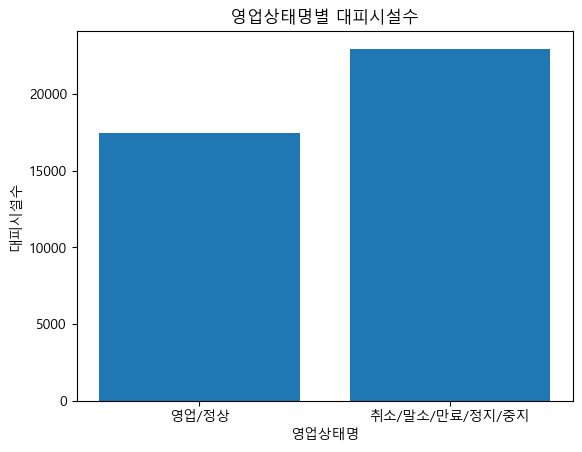

In [73]:
value_counts = df['영업상태명'].value_counts().sort_index()
# 막대 그래프 그리기
business_status =value_counts.index.tolist()
values = value_counts.values
x = np.arange(len(business_status))

plt.bar(x, values)
plt.xticks(x, business_status)
plt.xlabel('영업상태명')
plt.ylabel('대피시설수')
plt.title('영업상태명별 대피시설수')

plt.show()

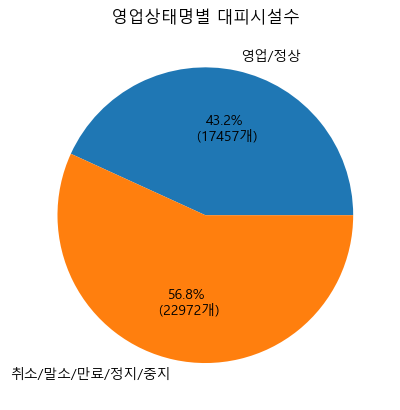

In [81]:
plt.pie(values, labels=business_status, autopct= lambda pct: f"{pct:.1f}%\n ({int(pct/100.*np.sum(values))}개)")
plt.title('영업상태명별 대피시설수')
plt.show()

### 3.4 데이터 분석 결과도출

* 데이터 분석을 통해 얻은 새로운 지식, 인사이트를 정리하세요.
* 새로운 지식 및 인사이트 별 비지니스 전략을 도출할 수 있으면 정리해 보세요

* 인사이트
    * 민방위대피시설 중 '영업/정상'인 시설은 43.2%(17,457개)이고 '취소/말소/만료/정지/중지'인 시설은 56.8%(22,972개)이다.  
    => 민방위대피시설 반 이상이 사용상에 문제가 있으므로, 시설의 재정비가 필요하다는 의견입니다.